# Importing Libraries

In [6]:
# Importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.
import nasdaqdatalink
warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight')

# Script

In [7]:
# setting path
path = r'C:\Users\faisa\Desktop\Data analysis\Data Immersion\Achievement 6'

In [8]:
# importing data set
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Combined Dataframe 1.1.pkl'))

In [9]:
pd.options.display.max_columns = False

#### Extra

In [11]:
df['order_created_at'] = pd.to_datetime(df['order_created_at'], format='ISO8601')

In [12]:
# convert datestamp to date only
df['order_date'] = df['order_created_at'].dt.strftime('%Y-%m-%d')

In [15]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Combined Dataframe 1.1.csv'))

In [29]:
# create order hour column
df['order_hour'] = df['order_created_at'].dt.hour

In [27]:
df['status'].value_counts()

status
Shipped       54440
Complete      45609
Processing    36388
Cancelled     27090
Returned      18232
Name: count, dtype: int64

In [30]:
df.head()

,order_id,user_id,status,gender,order_created_at,returned_at,shipped_at,delivered_at,num_of_item,first_name,last_name,age,state,postal_code,city,country,traffic_source,user_created_at,product_id,inventory_item_id,product_created_at,sale_price,cost,category,product_name,brand,department,distribution_center,distribution_center_latitude,distribution_center_logitude,price_category,profit,order_date,order_hour
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,Vanessa,Ross,52,Piauí,64120-000,União,Brazil,Organic,2020-10-02 10:03:00+00:00,6998,36,2022-10-22 07:55:58+00:00,15.67,7.44325,Shorts,Grane Supergirl Shorts,Grane,Women,Chicago IL,41.8369,-87.6847,Cheap,8.22675,2022-10-20,10
1,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,Vanessa,Ross,52,Piauí,64120-000,União,Brazil,Organic,2020-10-02 10:03:00+00:00,7173,29,2022-10-20 06:35:35+00:00,24.99,10.47081,Skirts,Woman Within Plus Size Petite flare skirt,Woman Within,Women,New Orleans LA,29.9500,-90.0667,Cheap,14.51919,2022-10-20,10
2,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,Vanessa,Ross,52,Piauí,64120-000,União,Brazil,Organic,2020-10-02 10:03:00+00:00,1488,33,2022-10-24 07:19:09+00:00,24.99,10.89564,Sweaters,LookbookStore Women Coloured Zip Mouth Smile S...,LookbookStore,Women,New Orleans LA,29.9500,-90.0667,Cheap,14.09436,2022-10-20,10
3,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaN,NaN,NaN,1,Melissa,Whitaker,56,Chung-cheong bukdo,360-100,Cheongju City,South Korea,Search,2022-08-16 02:12:00+00:00,14717,275,2023-01-20 00:35:38+00:00,16.99,6.67707,Maternity,Lace Cami Top and Boxer Shorts Lingerie Set,Angelina Hosiery,Women,Houston TX,29.7604,-95.3698,Cheap,10.31293,2023-01-20,2
4,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaN,NaN,NaN,1,Linda,White,40,New York,10474,New York,USA,Search,2020-01-07 09:11:00+00:00,9588,287,2021-12-06 06:35:44+00:00,36.00,22.06800,Sleep & Lounge,Calvin Klein Women's Nocturnal Elegance Camisole,Calvin Klein,Women,Houston TX,29.7604,-95.3698,Cheap,13.93200,2021-12-06,9


In [28]:
df['order_created_at'].value_counts()

order_created_at
2024-01-15 12:57:11.291061+00:00    11
2024-01-15 15:32:00+00:00           10
2023-12-30 08:06:00+00:00           10
2024-01-17 17:55:21.096187+00:00     9
2024-01-14 10:25:00+00:00            9
                                    ..
2023-10-31 01:43:00+00:00            1
2023-11-15 11:23:00+00:00            1
2021-05-07 16:25:00+00:00            1
2020-10-18 14:33:00+00:00            1
2020-05-30 07:24:00+00:00            1
Name: count, Length: 117373, dtype: int64

## Analysis

In [28]:
# creating data subset
df_sub = df.groupby('order_date')['order_id'].count().reset_index(name='order_count')

##### Creating a subset of data because I only need the dates and the count of orders.

In [29]:
df_sub

,order_date,order_count
0,2019-01,33
1,2019-02,56
2,2019-03,123
3,2019-04,170
4,2019-05,233
...,...,...
56,2023-09,7873
57,2023-10,8916
58,2023-11,9938
59,2023-12,12112


In [30]:
type(df_sub)

pandas.core.frame.DataFrame

In [31]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_date   61 non-null     object
 1   order_count  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [32]:
df_sub['order_date'] = pd.to_datetime(df_sub['order_date'], errors='coerce')

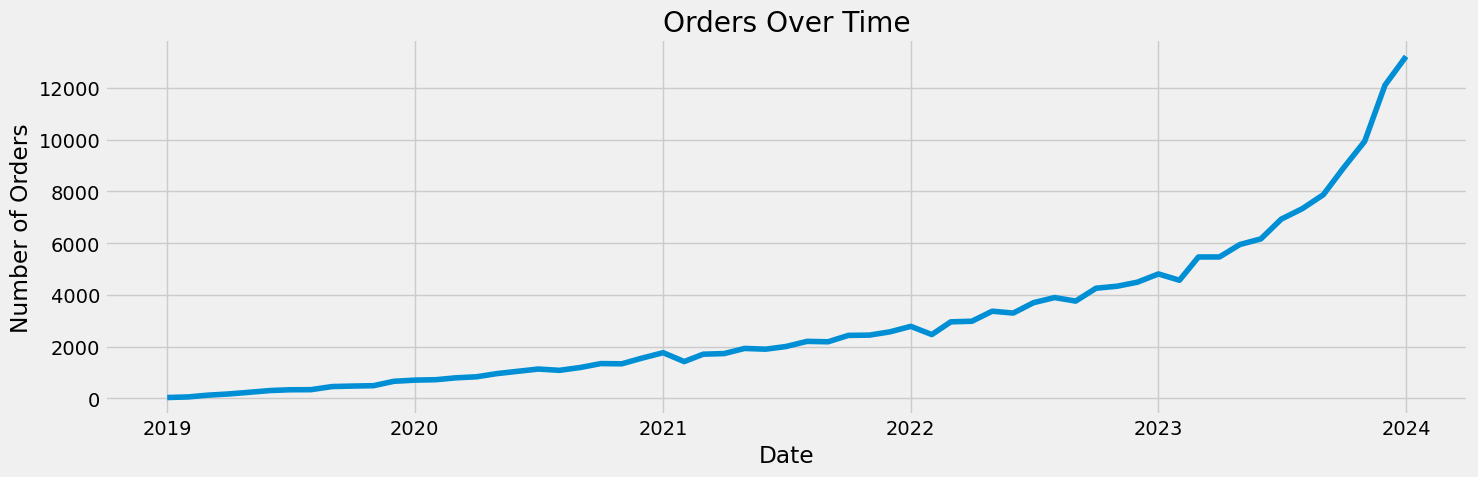

In [34]:
plt.figure(figsize=(15, 5), dpi=100)

plt.plot(df_sub['order_date'], df_sub['order_count'])

plt.title("Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.show()

#### The line chart above shows steady order numbers growth over the years.

### Time-series Analysis: Decomposition

In [53]:
df_sub1 = df[['order_created_at', 'order_id']]

In [59]:
df_sub1['order_created_at'] = pd.to_datetime(df_sub1['order_created_at'], format='ISO8601')

In [60]:
# convert datestamp to date only
df_sub1['order_created_date'] = df_sub1['order_created_at'].dt.strftime('%Y-%m-%d')

In [62]:
df_sub1 = df_sub1.drop(columns=['order_created_at'])

In [74]:
# creating a subset of data with date as string
df_sub2 = df_sub1.groupby('order_created_date')['order_id'].count().reset_index(name='order_count')

In [75]:
df_sub2

,order_created_date,order_count
0,2019-01-06,3
1,2019-01-07,1
2,2019-01-11,1
3,2019-01-13,3
4,2019-01-14,3
...,...,...
1813,2024-01-13,1095
1814,2024-01-14,1485
1815,2024-01-15,2351
1816,2024-01-16,820


In [48]:
from datetime import datetime

In [67]:
df_sub2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_created_date  1818 non-null   object
 1   order_count         1818 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 28.5+ KB


In [76]:
df_sub2['order_created_date'] = pd.to_datetime(df_sub2['order_created_date'])
df_sub2.set_index('order_created_date', inplace=True)

In [86]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_sub2['order_count'], model='additive', period=7)  # adjust period for your data

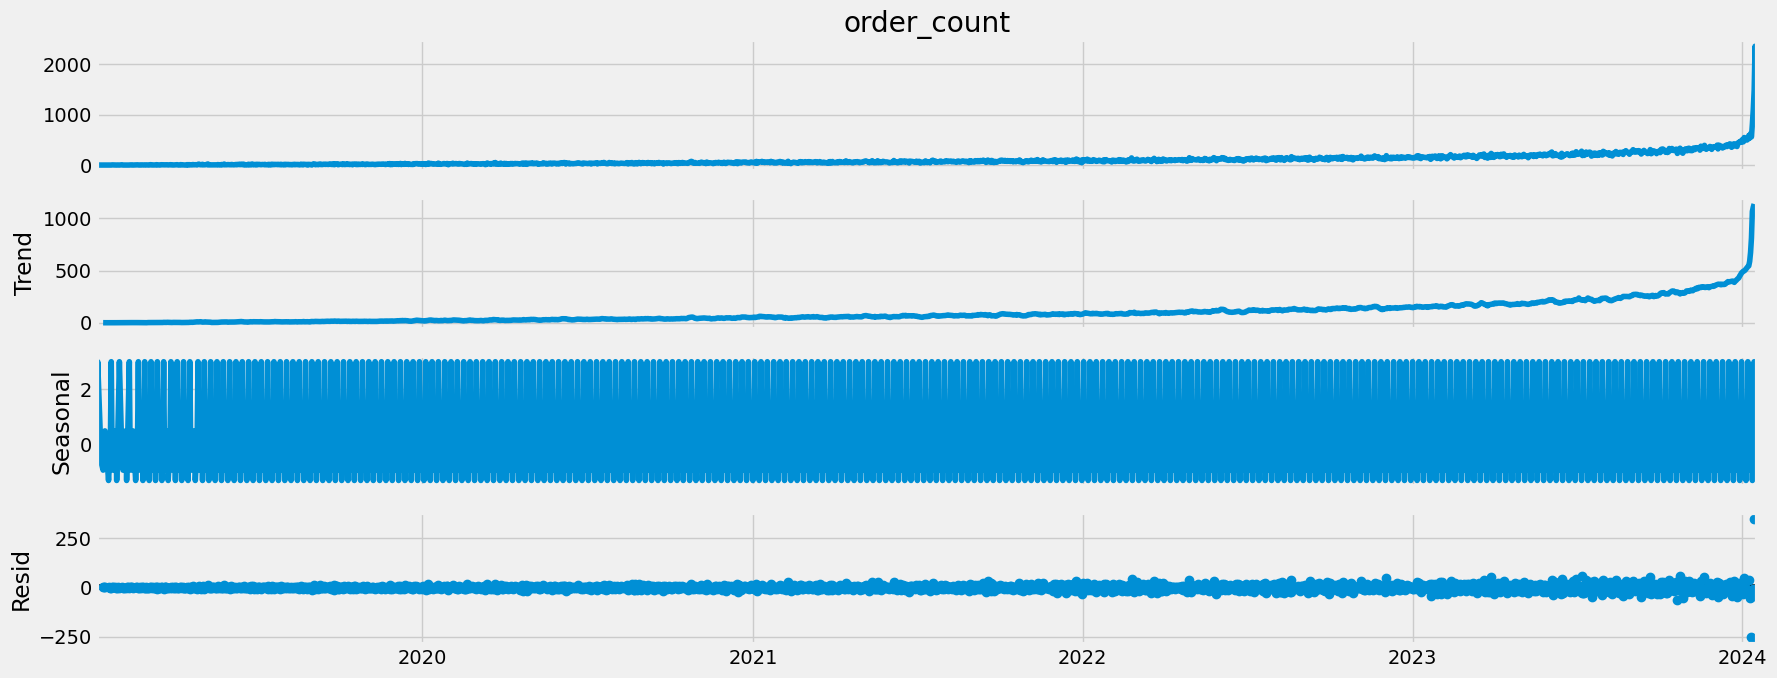

In [88]:
result.plot()
plt.show()

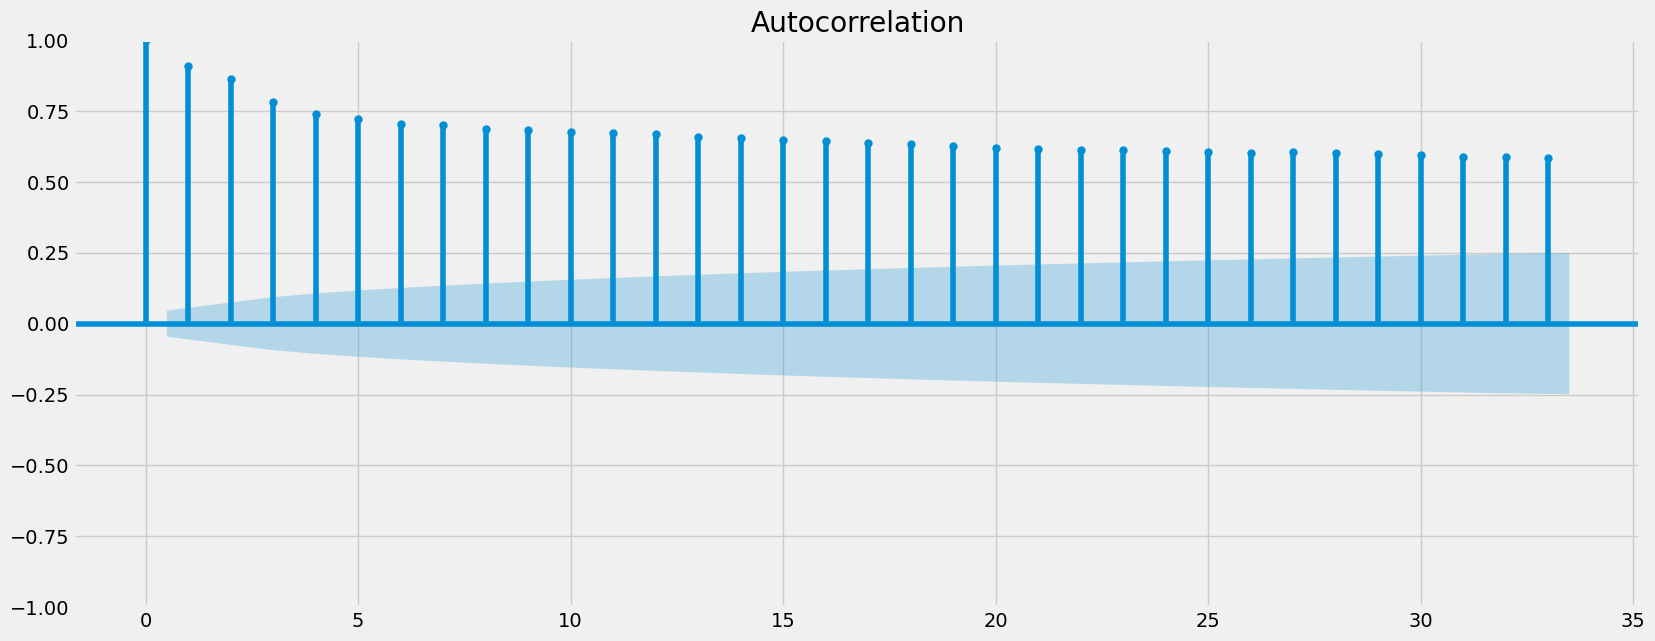

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_sub2)
plt.show()

### Stationarity Testing

In [90]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub2['order_count'])

Dickey-Fuller Stationarity test:
Test Statistic                    0.700624
p-value                           0.989850
Number of Lags Used              25.000000
Number of Observations Used    1792.000000
Critical Value (1%)              -3.434004
Critical Value (5%)              -2.863154
Critical Value (10%)             -2.567629
dtype: float64


#### Since our P-value is way greater than 0.05 it fails to reject Null Hypothesis which is _'the data is non-stationary'_.
#### Our Data is Non-Stationary
#### Test statistic is also greater than all critical values so the data is Non-stationary

### Round Differencing

In [91]:
df_diff = df_sub2 - df_sub2.shift(1)

In [93]:
df_diff.dropna(inplace = True)

In [94]:
df_diff.head()

,order_count
order_created_date,
2019-01-07,-2.0
2019-01-11,0.0
2019-01-13,2.0
2019-01-14,0.0
2019-01-15,0.0


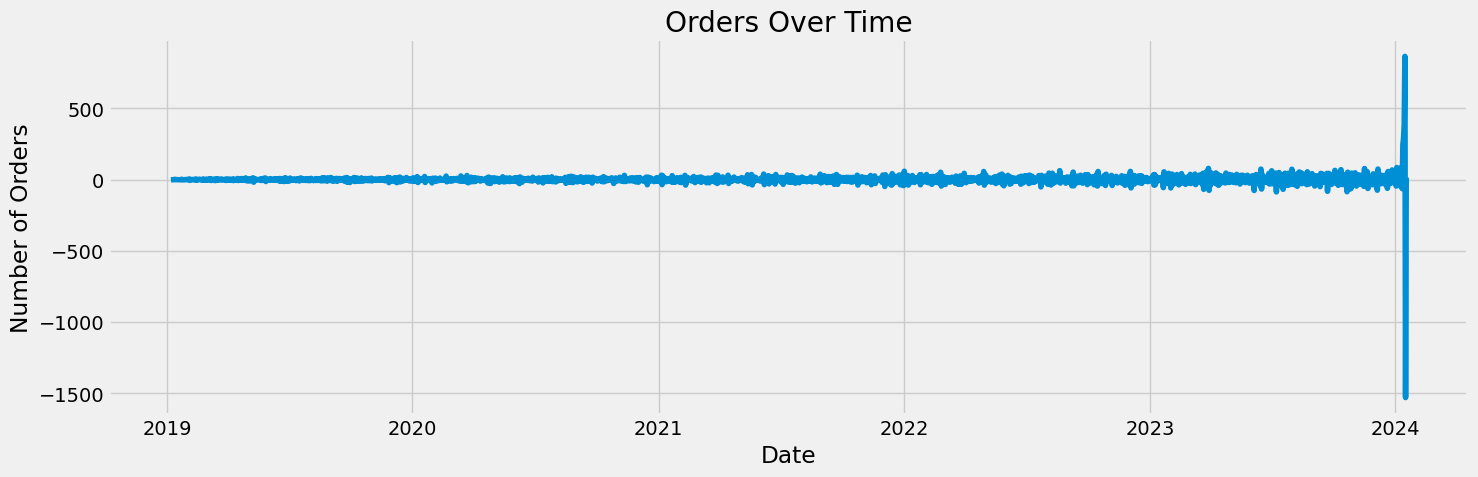

In [97]:
plt.figure(figsize=(15, 5), dpi=100)

plt.plot(df_diff)

plt.title("Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                    6.287480
p-value                           1.000000
Number of Lags Used              25.000000
Number of Observations Used    1791.000000
Critical Value (1%)              -3.434006
Critical Value (5%)              -2.863155
Critical Value (10%)             -2.567630
dtype: float64


#### Dataframe is still not stationary

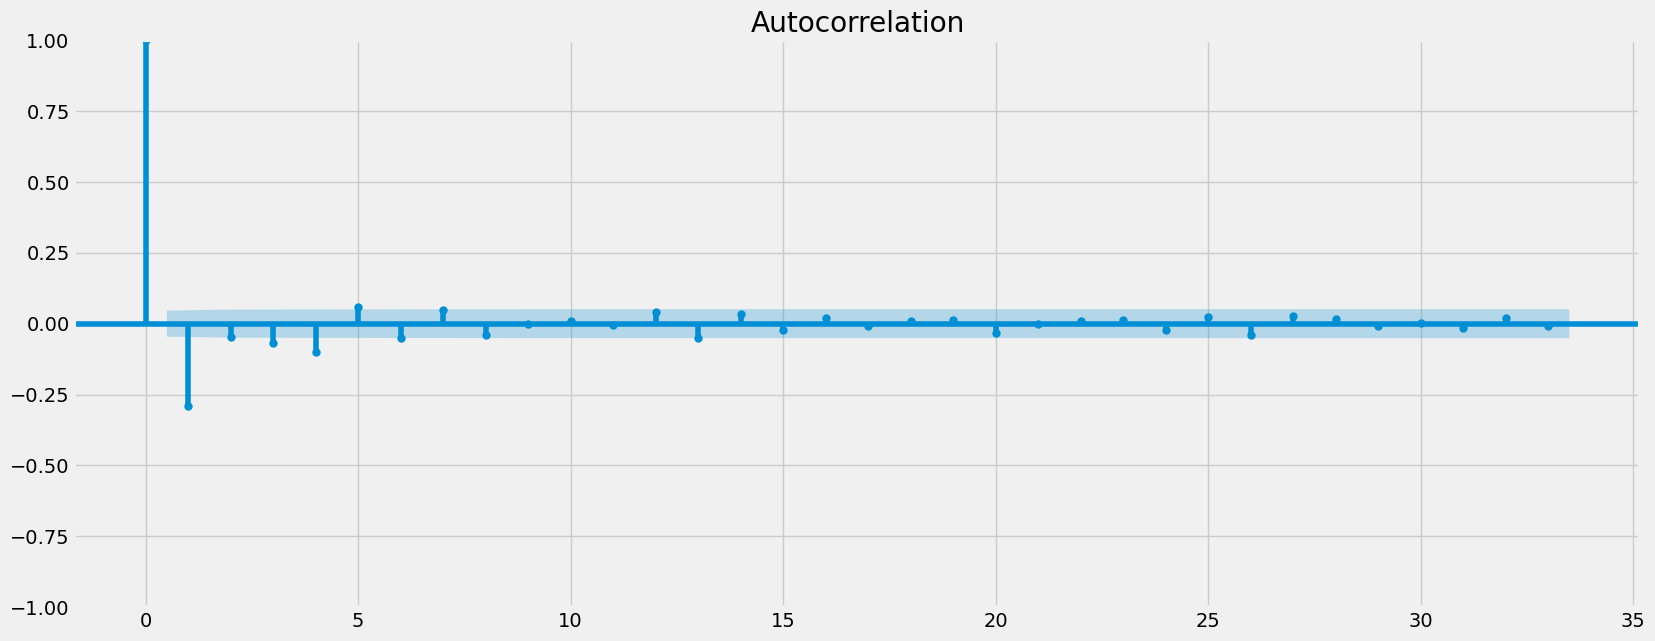

In [119]:
plot_acf(df_diff)
plt.show()

### Another round of Differencing

In [112]:
df_diff1 = df_sub2 - df_sub2.shift(2)

In [113]:
df_diff1.dropna(inplace = True)

In [114]:
df_diff1.head()

,order_count
order_created_date,
2019-01-11,-2.0
2019-01-13,2.0
2019-01-14,2.0
2019-01-15,0.0
2019-01-19,-1.0


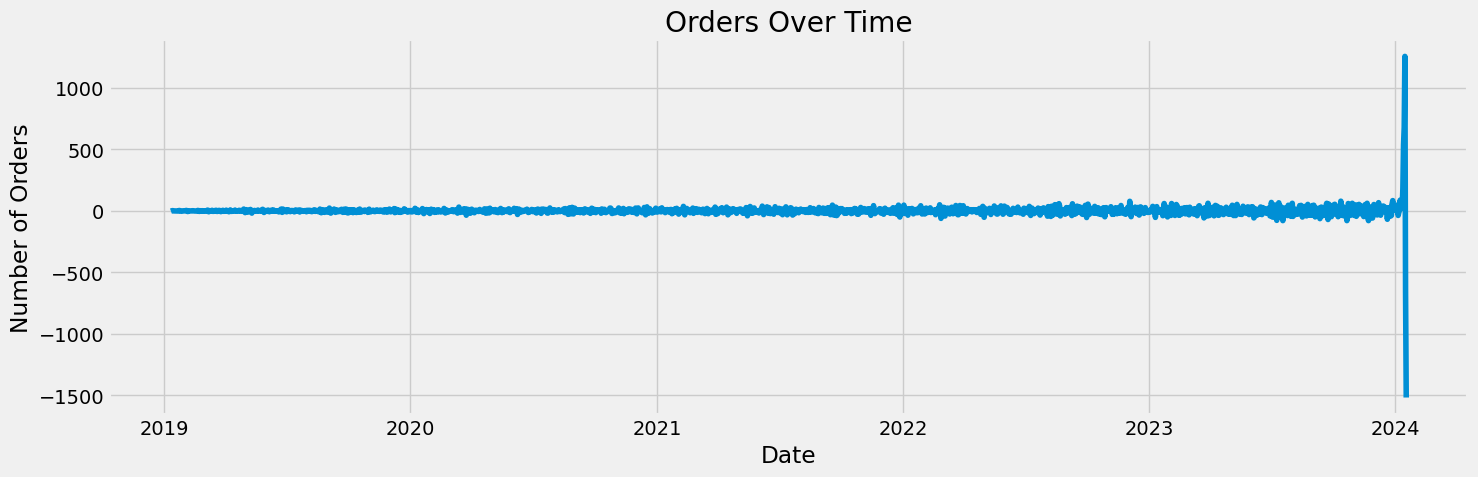

In [115]:
plt.figure(figsize=(15, 5), dpi=100)

plt.plot(df_diff1)

plt.title("Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.show()

In [116]:
dickey_fuller(df_diff1)

Dickey-Fuller Stationarity test:
Test Statistic                    6.361537
p-value                           1.000000
Number of Lags Used              24.000000
Number of Observations Used    1791.000000
Critical Value (1%)              -3.434006
Critical Value (5%)              -2.863155
Critical Value (10%)             -2.567630
dtype: float64


#### The dataframe is still not stationary

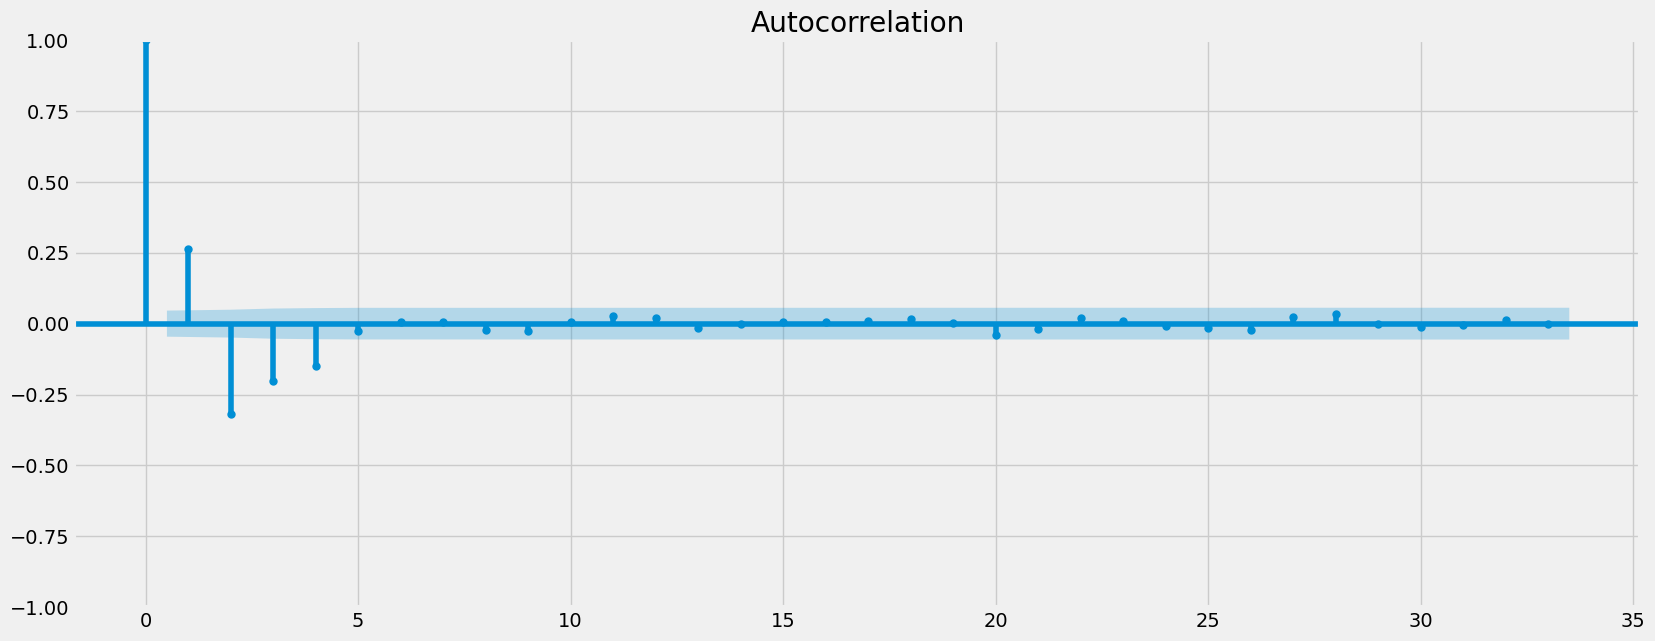

In [120]:
plot_acf(df_diff1)
plt.show()

# Export Dataframes


In [31]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Combined Dataframe 1.2.csv'))